In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

In [4]:
df = pd.read_csv('./dataset_phishing.csv')
print(df.head())

                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                

In [6]:
df.keys()

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [7]:
X = df.drop(columns=['url', 'status'])
y = df['status']

In [8]:
print(X)
print(y)

       length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  \
0              37               19   0        3           0      0      0   
1              77               23   1        1           0      0      0   
2             126               50   1        4           1      0      1   
3              18               11   0        2           0      0      0   
4              55               15   0        2           2      0      0   
...           ...              ...  ..      ...         ...    ...    ...   
11425          45               17   0        2           0      0      0   
11426          84               18   0        5           0      1      1   
11427         105               16   1        2           6      0      1   
11428          38               30   0        2           0      0      0   
11429         477               14   1       24           0      1      1   

       nb_and  nb_or  nb_eq  ...  empty_title  domain_in_title  \
0        

### Principal Component Analysis

In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
X_std = pd.DataFrame(data_scaled, columns=X.columns)

In [10]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [11]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum = np.cumsum(exp_var_pca)
print(cum_sum)

[0.10140136 0.15507702 0.20248731 0.24779926 0.2838507  0.31732355
 0.34629821 0.37152196 0.39379527 0.41553086 0.43439922 0.45231704
 0.4695745  0.48601019 0.50150818 0.516648   0.53108161 0.54529854
 0.55902461 0.57241946 0.58567752 0.5987424  0.61161335 0.62409963
 0.63656932 0.6488934  0.66117594 0.67335127 0.6853045  0.69687046
 0.70839142 0.71965307 0.73063001 0.74146469 0.75219509 0.76280673
 0.7733695  0.78333611 0.79313168 0.80281877 0.81226987 0.82158331
 0.83064085 0.83959591 0.84833398 0.85673123 0.86485856 0.87289768
 0.88063989 0.88820606 0.89556476 0.90271388 0.90964464 0.91638087
 0.92277684 0.92902984 0.93477254 0.94034456 0.94565521 0.95073752
 0.95541056 0.95997847 0.96450416 0.96845498 0.97226302 0.97584252
 0.97929242 0.98233537 0.98528895 0.98809131 0.9907244  0.9930394
 0.99495426 0.99658167 0.99775645 0.99868628 0.99923159 0.99966418
 0.99982097 0.99994532 1.         1.         1.         1.
 1.         1.         1.        ]


In [12]:
import matplotlib.pyplot as plt

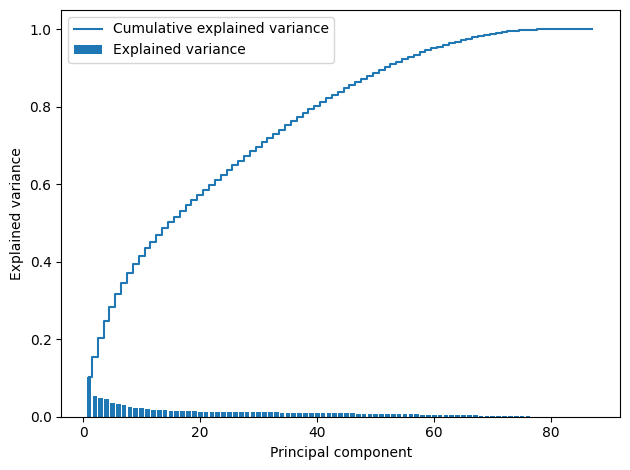

In [13]:
plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, align='center', label='Explained variance')
plt.step(range(1,len(cum_sum)+1), cum_sum, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

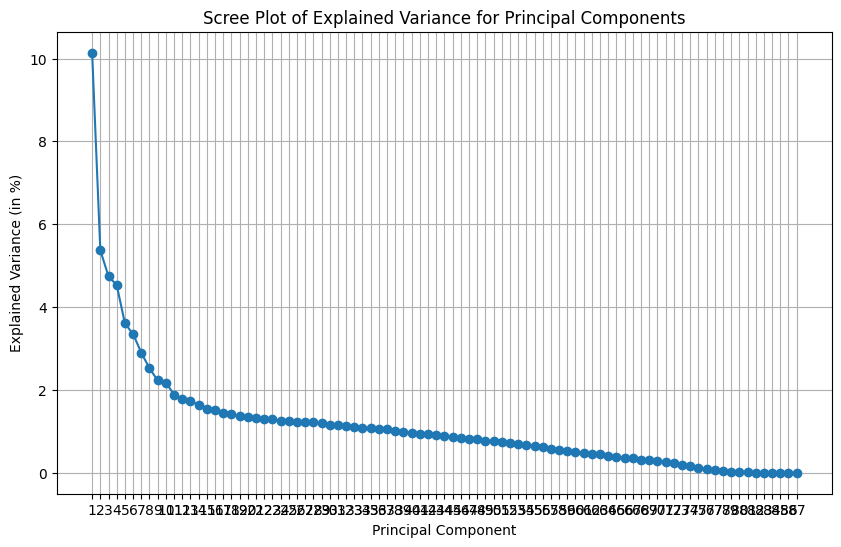

In [14]:
# Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Set figsize
plt.figure(figsize=(10, 6))

# Create a scree plot to visualize the explained variance
plt.plot(range(1, len(explained_variance) + 1), # x-axis
         explained_variance*100, # convert explained variance in percentage
         marker='o', # add a marker at each value
        )

# Add title and axis label
plt.title('Scree Plot of Explained Variance for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (in %)')

# Add label to x-axis
plt.xticks(range(1, len(explained_variance) + 1))

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()


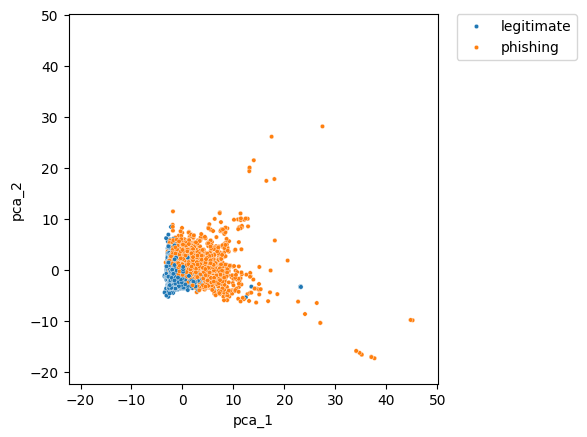

In [15]:
X = X_std#.drop(['used_chip', 'used_pin_number', 'repeat_retailer'], axis = 1)
#y = cardsData['fraud']
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

### tSNE

In [16]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

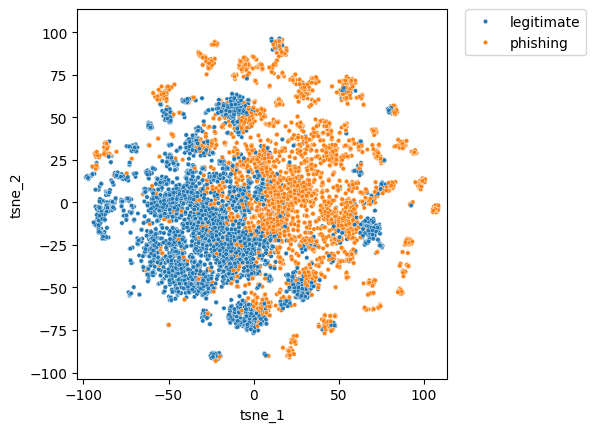

In [17]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)